<a href="https://colab.research.google.com/github/bimbimpop/Machine-Learning-Portofolio/blob/main/Predicting%20Pain%20Reliever%20Misuse/Abuse%20-%20Using%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
life_path = '/content/drive/MyDrive/POEROFOIO/DATASET/Predicting Pain Reliever Misuse Abuse/prlmis-data-full.csv'
df = pd.read_csv('/content/drive/MyDrive/POEROFOIO/DATASET/Predicting Pain Reliever Misuse Abuse/prlmis-data-full.csv')
df.head()

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
0,15,3,1,0,2,2,0,3,4,1,...,10,1,5,5,0,5,2,2,6,0
1,15,3,0,0,3,1,0,6,7,1,...,10,1,5,5,0,4,3,5,5,0
2,15,2,0,0,3,0,0,4,2,1,...,9,1,5,5,0,4,2,3,7,2
3,15,1,0,0,1,0,0,5,0,1,...,9,1,5,5,0,3,2,2,0,0
4,15,5,0,0,3,0,0,5,2,1,...,9,1,5,5,3,2,2,2,7,0


In [2]:
#Cek Missing Value
df.info()

#Lihat statistik dasar
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170317 entries, 0 to 170316
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   YEAR       170317 non-null  int64
 1   AGECAT     170317 non-null  int64
 2   SEX        170317 non-null  int64
 3   MARRIED    170317 non-null  int64
 4   EDUCAT     170317 non-null  int64
 5   EMPLOY18   170317 non-null  int64
 6   CTYMETRO   170317 non-null  int64
 7   HEALTH     170317 non-null  int64
 8   MENTHLTH   170317 non-null  int64
 9   PRLMISEVR  170317 non-null  int64
 10  PRLMISAB   170317 non-null  int64
 11  PRLANY     170317 non-null  int64
 12  HEROINEVR  170317 non-null  int64
 13  HEROINUSE  170317 non-null  int64
 14  TRQLZRS    170317 non-null  int64
 15  SEDATVS    170317 non-null  int64
 16  COCAINE    170317 non-null  int64
 17  AMPHETMN   170317 non-null  int64
 18  HALUCNG    170317 non-null  int64
 19  TRTMENT    170317 non-null  int64
 20  MHTRTMT    170317 non-null

,YEAR,AGECAT,SEX,MARRIED,EDUCAT,EMPLOY18,CTYMETRO,HEALTH,MENTHLTH,PRLMISEVR,...,PRLANY,HEROINEVR,HEROINUSE,TRQLZRS,SEDATVS,COCAINE,AMPHETMN,HALUCNG,TRTMENT,MHTRTMT
count,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,...,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000,170317.000000
mean,15.994892,2.772078,0.524927,1.286448,3.063623,0.901419,1.493726,2.330020,0.950698,0.107077,...,0.378893,0.020157,0.031389,0.223988,0.051304,0.179459,0.153825,0.327947,0.061133,0.208828
std,0.816042,1.409875,0.499380,1.517425,1.457736,0.933172,1.231702,1.054522,1.903671,0.309212,...,0.795211,0.140536,0.266169,0.719446,0.325596,0.561877,0.500246,0.869154,0.543367,0.652826
min,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,3.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,4.000000,1.000000,2.000000,4.000000,2.000000,3.000000,3.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.000000,5.000000,1.000000,4.000000,5.000000,2.000000,3.000000,7.000000,10.000000,1.000000,...,10.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,8.000000


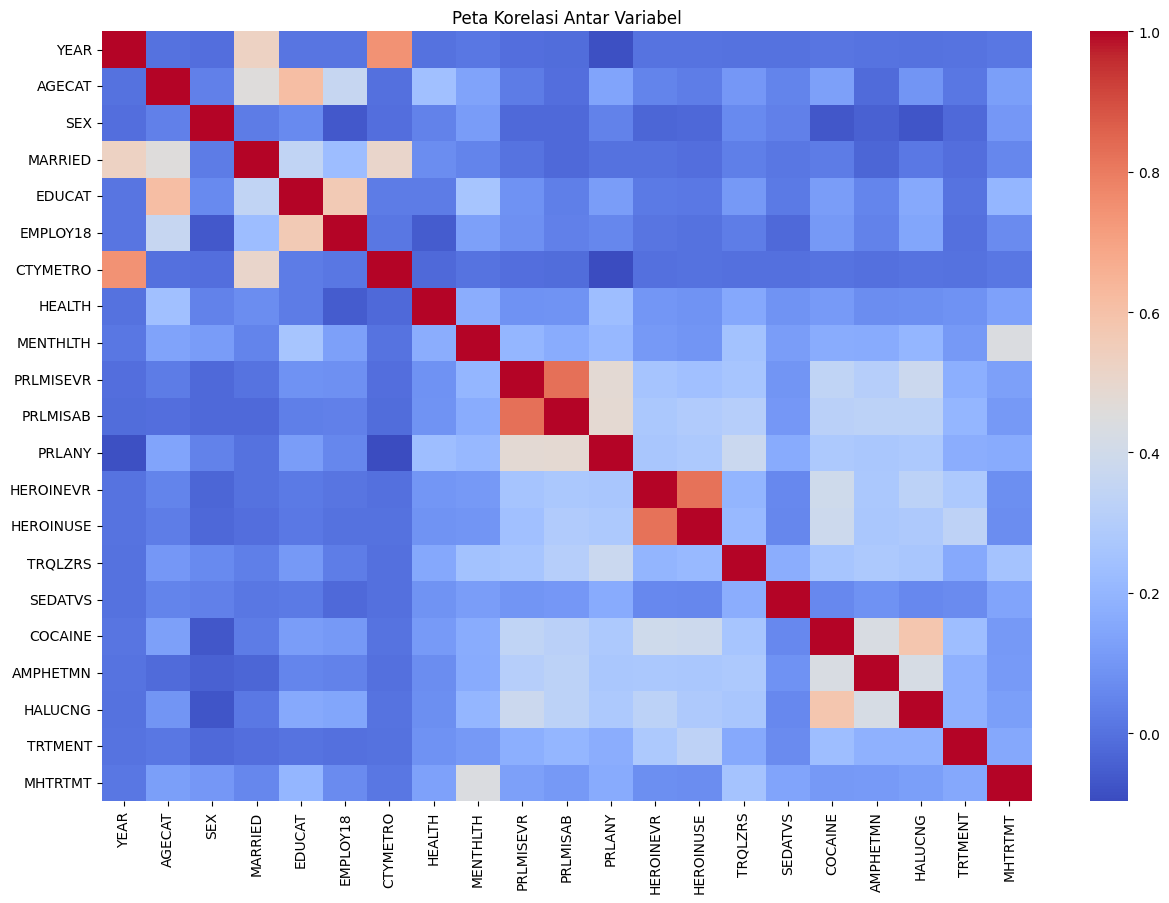

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

#Membuat heatmap korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Peta Korelasi Antar Variabel')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#1. Menentukan Fitur (X) dan Target (Y)
#Mengapus variabel yang terlalu kirip dengan target
X = df.drop(['PRLMISAB', 'PRLMISEVR'], axis=1)
y = df['PRLMISAB']

#2. Bagi data (80% trainig, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Panggil Model
model = LogisticRegression(max_iter=1000)

#Latih Model
model.fit(X_train, y_train)

#Prediksi
y_pred = model.predict(X_test)

#Lihat hasil
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     30513
           1       0.00      0.00      0.00         4
           2       0.32      0.15      0.20      1850
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4
           7       0.36      0.01      0.03       689
           8       0.00      0.00      0.00       317
           9       0.00      0.00      0.00       313
          10       0.41      0.35      0.38       371

    accuracy                           0.90     34064
   macro avg       0.22      0.17      0.17     34064
weighted avg       0.85      0.90      0.87     34064



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
#Interpretasi: Data Imbalance, model memiliki recall rendah pada minoritas -> ubah pendekatan jadi deteksi biner (rentan vs tidak rentan)

#Ubah target jadi binary
y_binary = y.apply(lambda x: 1 if x> 0 else 0)

#Ulangi proses training dengan y_binary
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
model_binary = LogisticRegression(max_iter=1000)
model_binary.fit(X_train, y_train)

#Cek rapor terbaru
print(classification_report(y_test, model_binary.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     30513
           1       0.65      0.35      0.45      3551

    accuracy                           0.91     34064
   macro avg       0.79      0.66      0.70     34064
weighted avg       0.90      0.91      0.90     34064



In [6]:
#Fokus upaya preventif, recall harus naik

#Install SMOTE
!pip install -U imbalanced-learn

#Implementasi SMOTE ke kode
from imblearn.over_sampling import SMOTE
from collections import Counter

#1. Inisiasi SMOTE
smote = SMOTE(random_state=42)

#2. Resampling data training
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#Cek perbandingan jumlah data baru
print('Jumlah data sebelum SMOTE:', Counter(y_train))
print('Jumlah data setelah SMOTE:', Counter(y_train_res))

#Latih ulang model pakai hasil SMOTE
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_res, y_train_res)

#Evaluasi hasilnya
y_pred_smote = model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

Jumlah data sebelum SMOTE: Counter({0: 121567, 1: 14686})
Jumlah data setelah SMOTE: Counter({0: 121567, 1: 121567})
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     30513
           1       0.44      0.95      0.60      3551

    accuracy                           0.87     34064
   macro avg       0.71      0.90      0.76     34064
weighted avg       0.93      0.87      0.89     34064



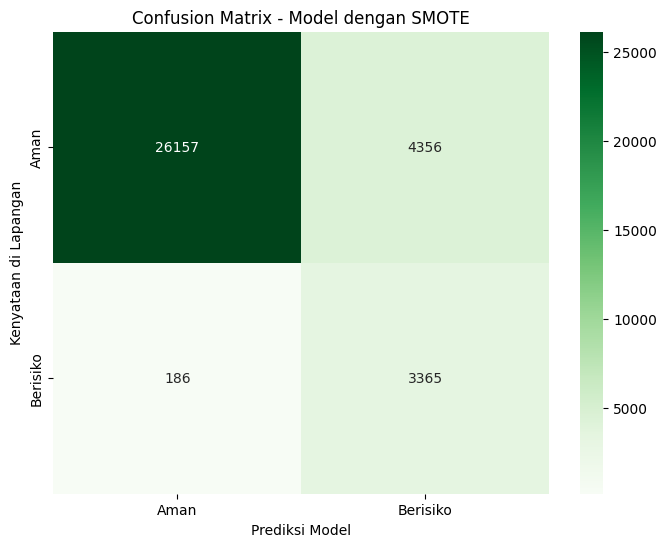

In [7]:
#VISUALISASI DATA

#Confusion Matrix (kejujuran model)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Hitung confussion matrix
cm = confusion_matrix(y_test, y_pred_smote)

#Buat plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Aman', 'Berisiko'],
            yticklabels=['Aman', 'Berisiko'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan di Lapangan')
plt.title('Confusion Matrix - Model dengan SMOTE')
plt.show()

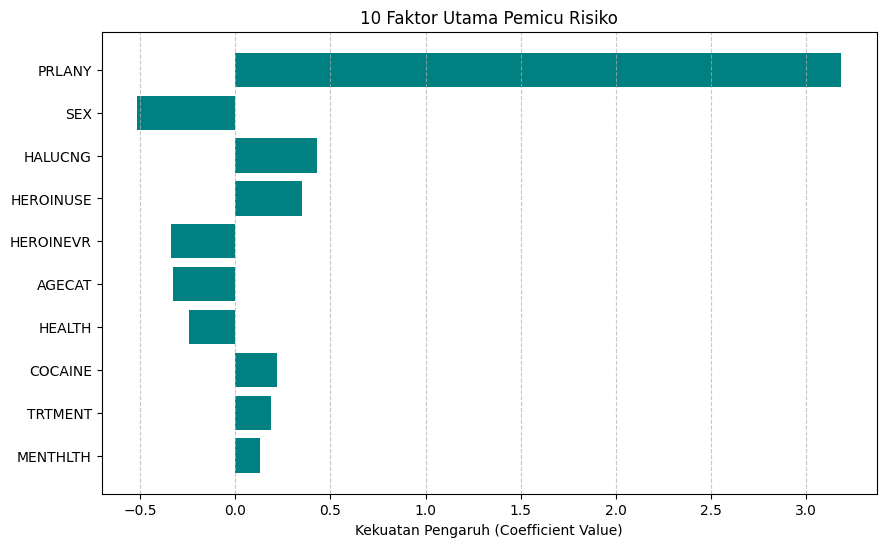

In [8]:
#Faktor Dominan
import numpy as np

#Ambil koefisien dari Logistic Regression
importance = model_smote.coef_[0]
feature_name = X.columns

#Mengurutkan faktor dari yg paling berpengaruh
indices = np.argsort(np.abs(importance))[-10:]

plt.figure(figsize=(10, 6))
plt.title('10 Faktor Utama Pemicu Risiko')
plt.barh(range(len(indices)), importance[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Kekuatan Pengaruh (Coefficient Value)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

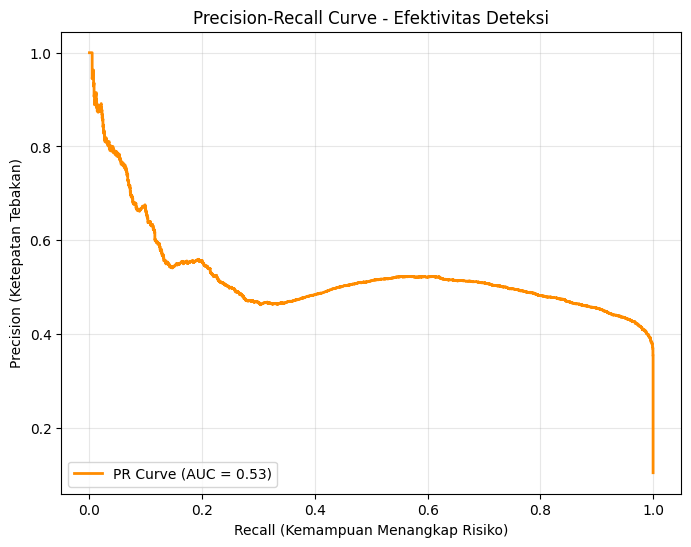

In [9]:
#Kurva Precission-Recall
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, model_smote.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='darkorange', lw=2)
plt.xlabel('Recall (Kemampuan Menangkap Risiko)')
plt.ylabel('Precision (Ketepatan Tebakan)')
plt.title('Precision-Recall Curve - Efektivitas Deteksi')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()